In [21]:
import pandas as pd
from io import StringIO
from datetime import datetime
import numpy as np
from scipy.stats import pearsonr


def read_dsc_txt(file_path):
    """ Reads the contents of a DSC/TGA txt from filepath, returns cleaned dataframe.

    Args:
        file_path (str): the path of the file
    Returns:
        df (Pandas.DataFrame): the cleaned dataframe of sample run data
        experiment_name (str): the experiment name
        completion_date (Datetime): the time/date of completion
    """

    lines = []

    # open the file with utf-16 encoding
    with open(file_path, 'r', encoding='utf-16') as infile:
        
        # skip the first line with a weird character
        next(infile)

        # remove the index part of each line -- pandas automatically inserts it
        lines = [line for line in infile]

    
    # get the sample info from the string at the bottom
    info = lines[-1].split(',')
    experiment_name = info[0]
    completion_date = datetime.strptime(info[1], " %d.%m.%Y %H:%M:%S\n")

    # remove whitespace
    lines = lines[1:-1]
    
    columns = ["Ts", "t", "HF", "Weight", "Tr"]

    # use .split() to get everything after index
    df = pd.DataFrame([line.split()[1:] for line in lines], columns=columns).astype(float)
   
    return df, experiment_name, completion_date



import os

dsc_folder_path = 'Feb_18_analysis'

df_list = []
name_list = []
date_list = []

# iterate through DSC txt and create dataframe of files
for filename in os.listdir(dsc_folder_path):
    file_path = os.path.join(dsc_folder_path, filename)
    if os.path.isfile(file_path):

        df, name, date = read_dsc_txt(file_path)

        df_list.append(df)
        name_list.append(name)
        date_list.append(date)

df_list[9].head()


# trim everything around 200, 240
df_list = [ df[(df['Tr'] >= 200) & (df['Tr'] <= 240)] for df in df_list]

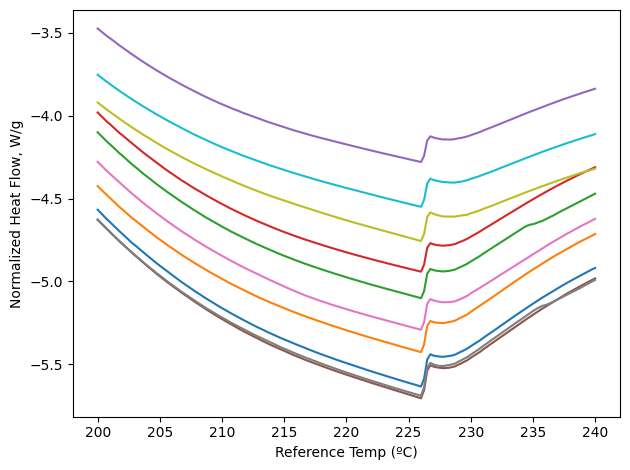

In [34]:
import matplotlib.pyplot as plt

for df in df_list:
    df['HF/g'] = df['HF'] / df['Weight']
    plt.plot(df['Tr'], df['HF/g'])


plt.xlabel('Reference Temp (ºC)')
plt.ylabel('Normalized Heat Flow, W/g')

plt.tight_layout()
plt.show()


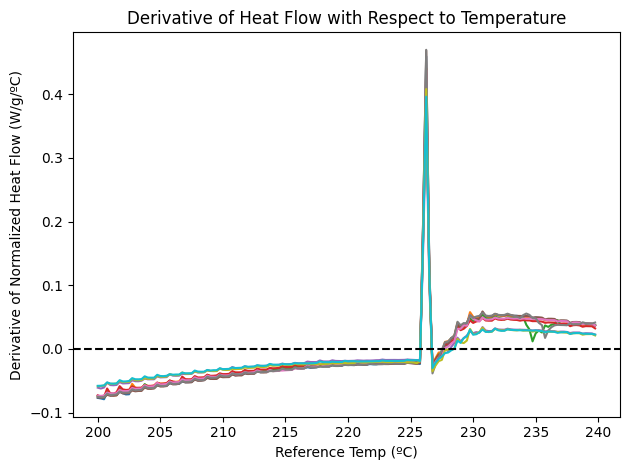

In [40]:
import matplotlib.pyplot as plt
import numpy as np

for df in df_list:
    df['HF/g'] = df['HF'] / df['Weight']
    
    
    dHFg_dTr = np.diff(df['HF/g']) / np.diff(df['Tr'])
    
    
    Tr_trimmed = df['Tr'].iloc[:-1] #remove last element bc of way numpy does diff
    
    plt.plot(Tr_trimmed, dHFg_dTr)

plt.xlabel('Reference Temp (ºC)')
plt.ylabel('Derivative of Normalized Heat Flow (W/g/ºC)')
plt.title('Derivative of Heat Flow with Respect to Temperature')
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()
